# **EDA: Adoptable Dogs**

Let's get started with these cute dogs to get in the mood 🐶

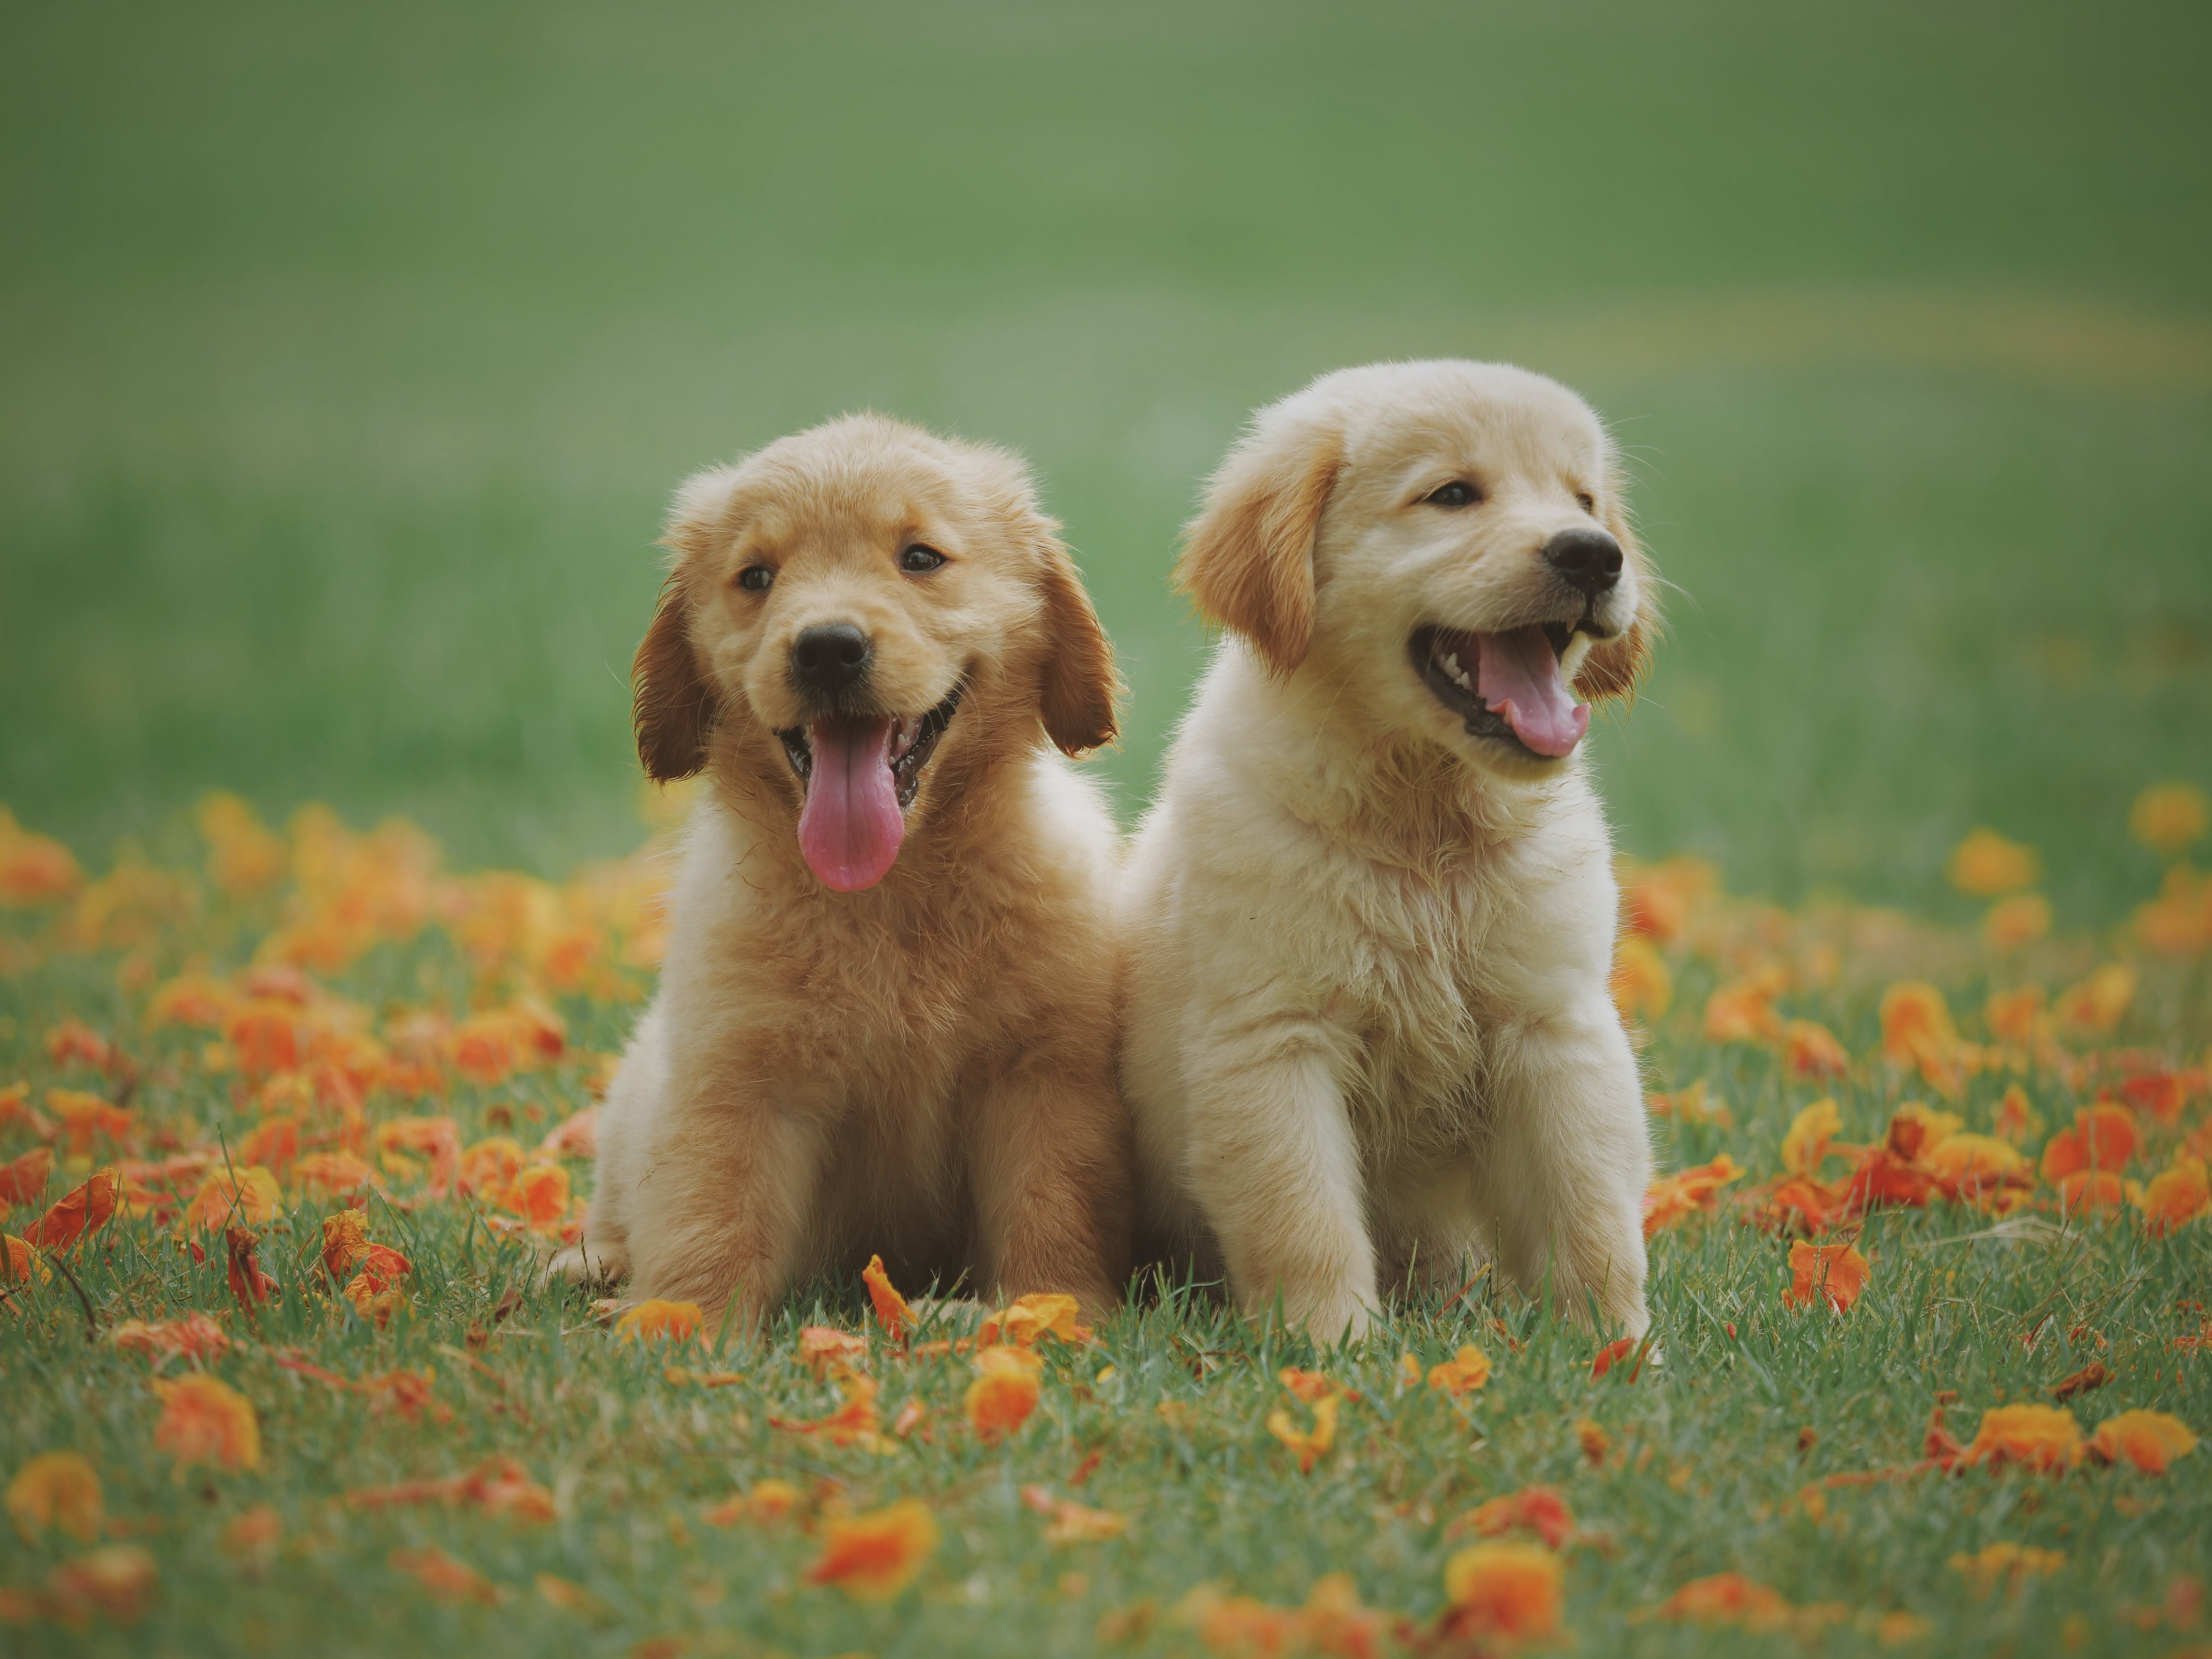

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("ShelterDogs.csv")

Now, let's get familiar with the dataset.

In [ ]:
df.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,year_found
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN,2019
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
df.shape

(2937, 19)

⬆ *Nice, means there are 2937 dogs to choose from!*

In [ ]:
df.dtypes

ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
dtype: object

In [ ]:
df.isnull().sum()

ID                      0
name                   92
age                     0
sex                     0
breed                   0
date_found              0
adoptable_from          0
posted                  0
color                   0
coat                    0
size                    0
neutered             1085
housebroken          2477
likes_people          938
likes_children       1718
get_along_males      1304
get_along_females    1264
get_along_cats       2506
keep_in              1021
dtype: int64

In [ ]:
# print("The breeds to choose from: ", df['breed'].unique())
# To my surprise, there were a lot of unique breeds, so I'm just gonna comment this line :D
print("The coat types: ", df['coat'].unique())
print("The available colors: ", df['color'].unique())

The coat types:  ['short' 'medium' 'long' 'wirehaired']
The available colors:  ['red' 'black and white' 'saddle back' 'yellow-brown' 'black' 'brown'
 'gray and white' 'brown and white' 'tricolor' 'spotty' 'white' 'apricot'
 'black and brown' 'golden' 'striped' 'yellow' 'wild boar' 'black and tan'
 'gray and black' 'sable' 'gray' 'red and white' 'dotted']


In [ ]:
print("The number of neutered dogs: ", df['neutered'].count())
print("The number of housebroken dogs: ", df['housebroken'].count())

The number of neutered dogs:  1852
The number of housebroken dogs:  460


### Getting into the interesting part: ***visualizations***!!

Age frequencies

<Axes: title={'center': 'age'}, ylabel='Frequency'>

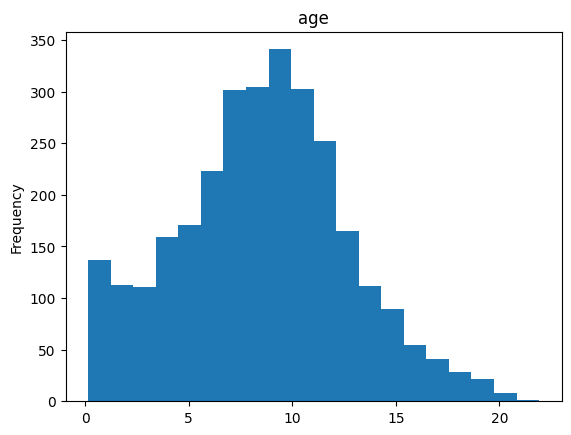

In [ ]:
df['age'].plot(kind='hist', bins=20, title='age')

The number of male dogs vs the number of female dogs

<Axes: ylabel='sex'>

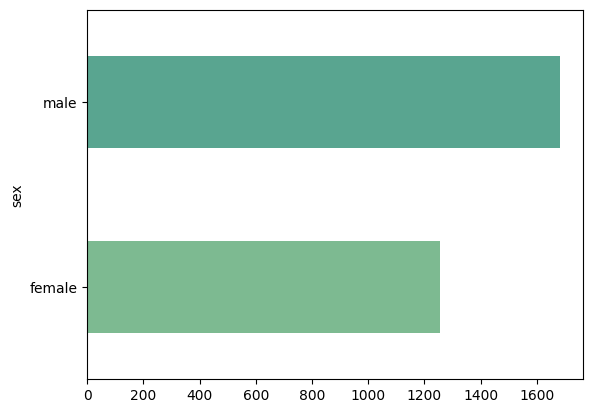

In [ ]:
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('crest'))

The number of dogs corresponding to their sizes

<Axes: ylabel='size'>

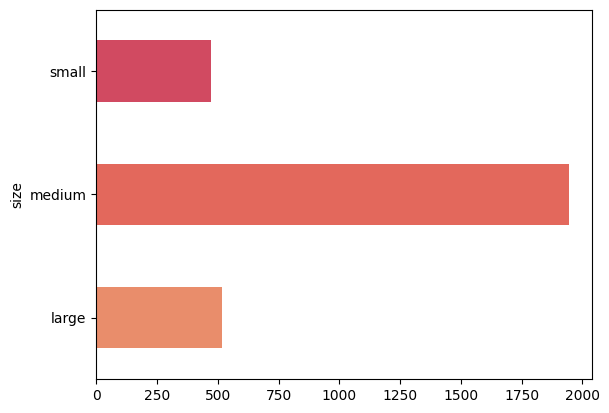

In [ ]:
df.groupby('size').size().plot(kind='barh', color=sns.palettes.mpl_palette('flare'))

Let's look at the correlation of coat type and size...

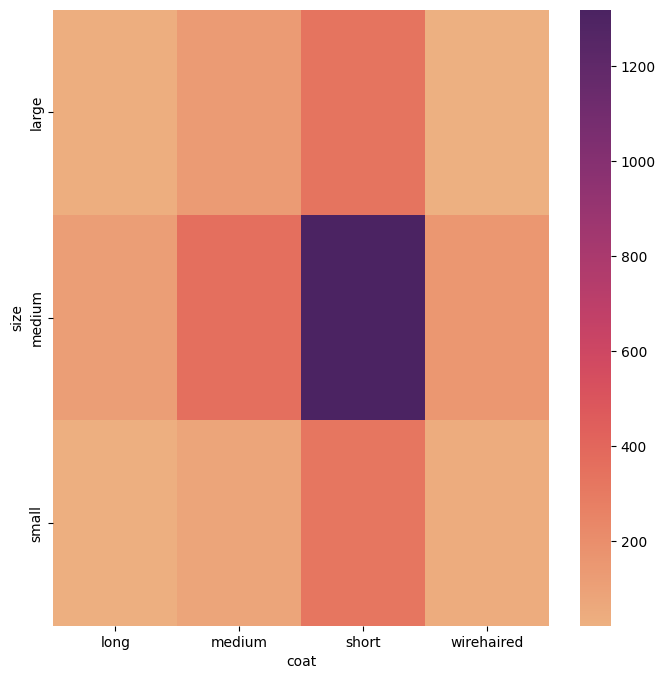

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['size'].value_counts()
    for x_label, grp in df.groupby('coat')
})
sns.heatmap(df_2dhist, cmap='flare')
plt.xlabel('coat')
_ = plt.ylabel('size')

... now at the relationship between sex and coat type.

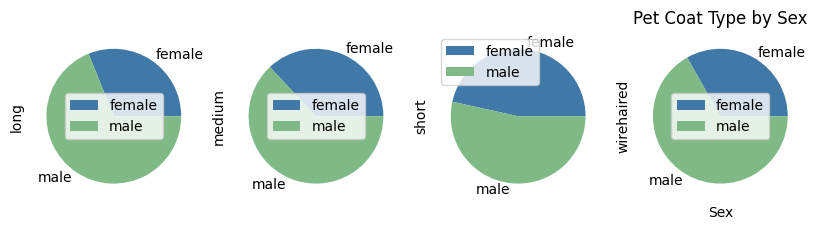

In [ ]:
colors = {'female': '#4078a8', 'male': '#7fba86'}

ax = df.groupby(['sex', 'coat']).size().unstack().plot(kind='pie', subplots=True, colors=[colors[col] for col in df['sex'].unique()], figsize=(10, 10))
plt.xlabel('Sex')
plt.title('Pet Coat Type by Sex')
plt.show()

Now let's figure out if being housebroken (trained) has anything to do with liking people. Logically, trained dogs should be more friendly.

Text(70.72222222222221, 0.5, 'likes_people')

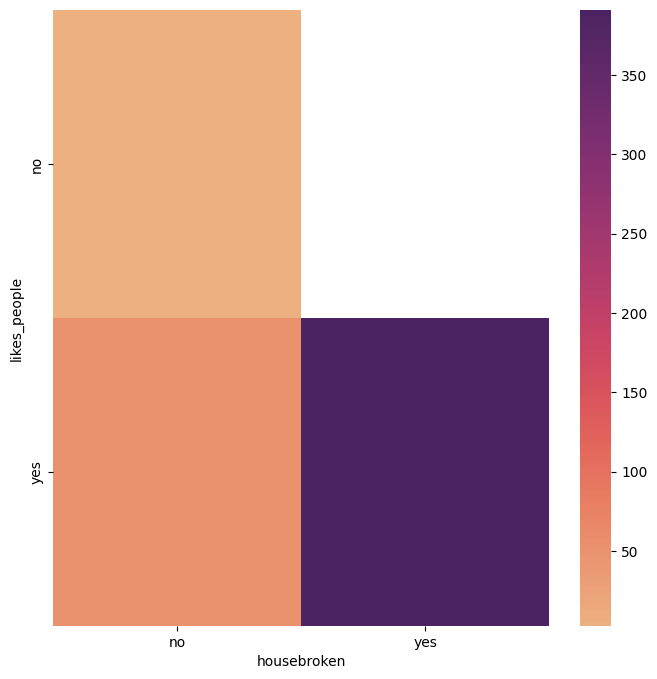

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['likes_people'].value_counts()
    for x_label, grp in df.groupby('housebroken')
})
sns.heatmap(df_2dhist, cmap='flare')
plt.xlabel('housebroken')
plt.ylabel('likes_people')

If you like cats 🐈 like me, it must be important for you to know if your adopted dog gets along with cats, so you'll want to know the breed that gets along with cats the most.

In [ ]:
df['get_along_cats'].fillna('Unknown', inplace=True)

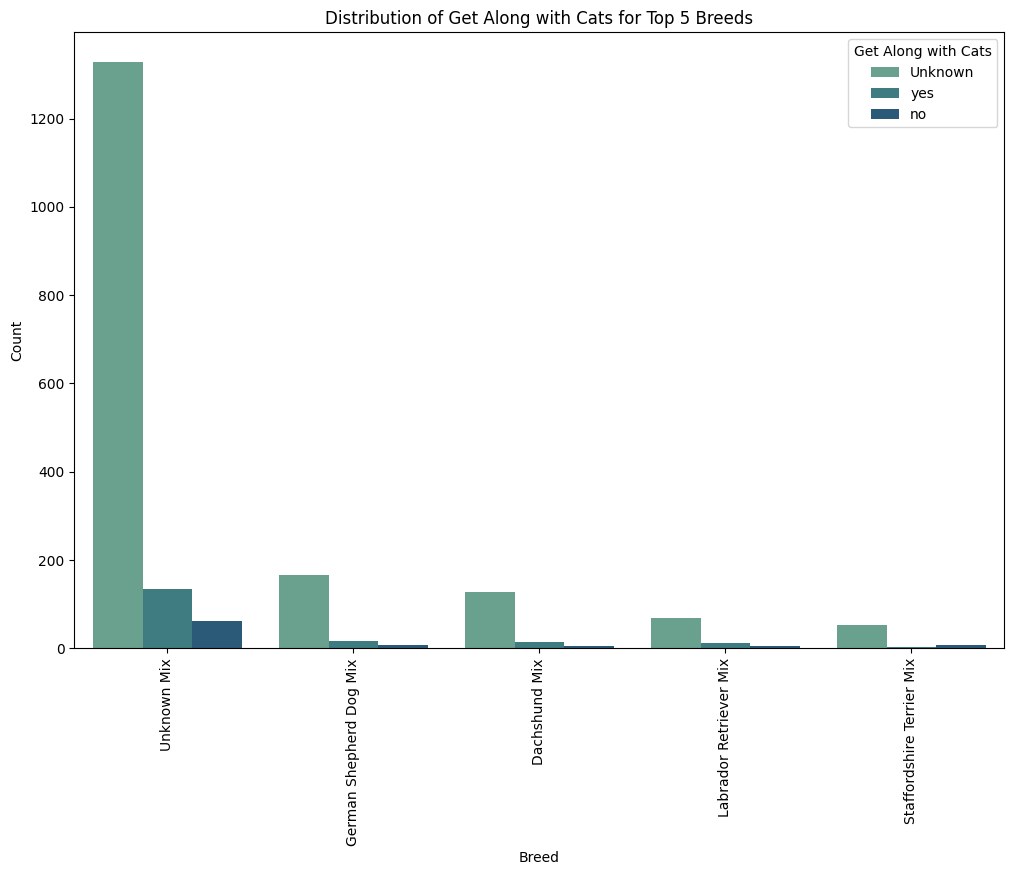

In [ ]:
breed_counts = df.groupby('breed')['get_along_cats'].value_counts().unstack().fillna(0)
top_5_breeds = breed_counts.sum(axis=1).nlargest(5).index

top_5_df = df[df['breed'].isin(top_5_breeds)]

plt.figure(figsize=(12, 8))
sns.countplot(x='breed', hue='get_along_cats', data=top_5_df, order=top_5_breeds, palette='crest')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Distribution of Get Along with Cats for Top 5 Breeds')
plt.xticks(rotation=90)
plt.legend(title='Get Along with Cats')
plt.show()

### Now, let's make animations 🌠

Let's look at some feature changes during the years of founding adoptable dogs.For that let us have a column just for the year of founding adoptable dogs.

In [ ]:
df['date_found'] = pd.to_datetime(df['date_found'])
df['year_found'] = df['date_found'].dt.year

In [ ]:
px.scatter(
data_frame=df,
x='color',
y='neutered',
color='sex',
size='age',
animation_frame='year_found',
color_discrete_sequence=['#e3a7fa', '#8cd1b2'])

In the following plot, we can see if the dogs found during the years were neutered by their color, age (based on the sizes of the scatters), gender (based on the color).